In [1]:
set.seed(2475)

## Market Data

In [2]:
library(ISLR)
attach(Smarket)

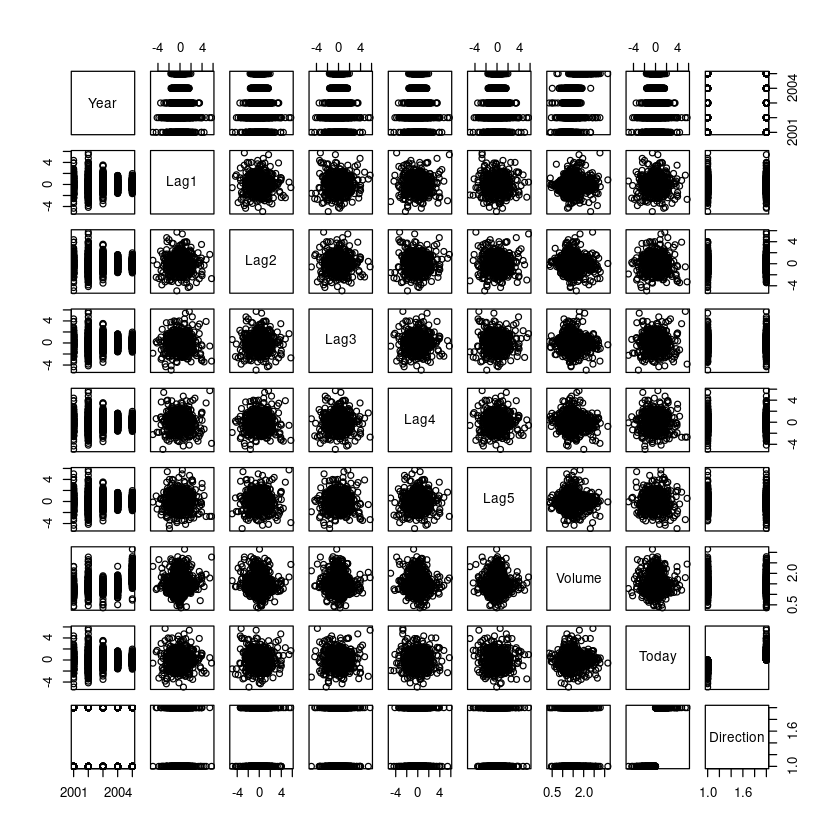

In [3]:
plot(Smarket)

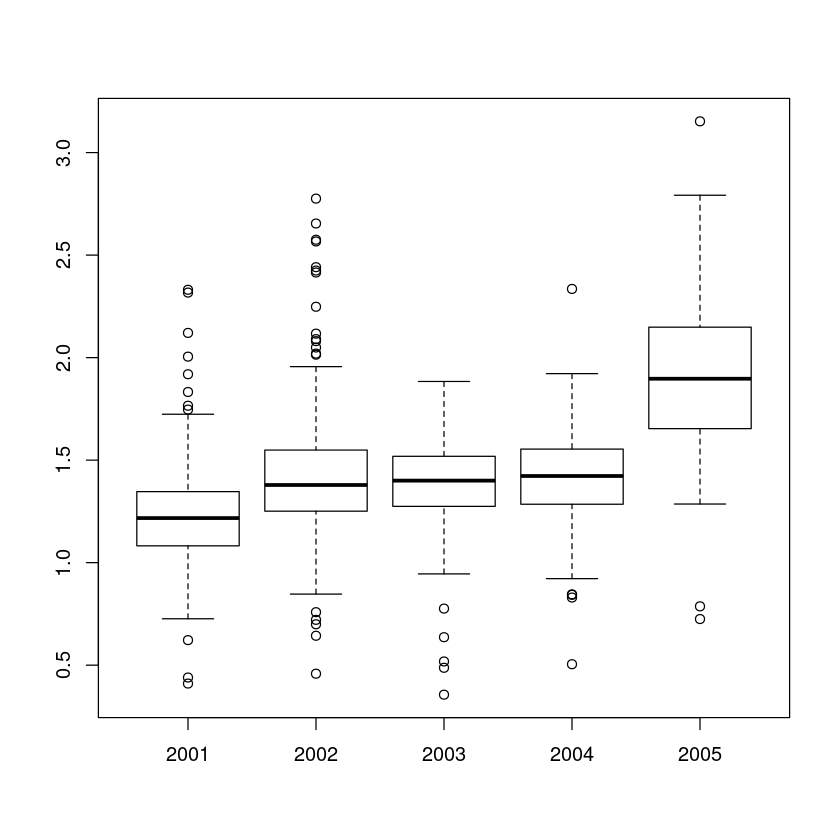

In [4]:
boxplot(Volume~ Year)

Group.1,x
2001,1.226950
2002,1.428451
2003,1.384693
2004,1.424159
2005,1.917298


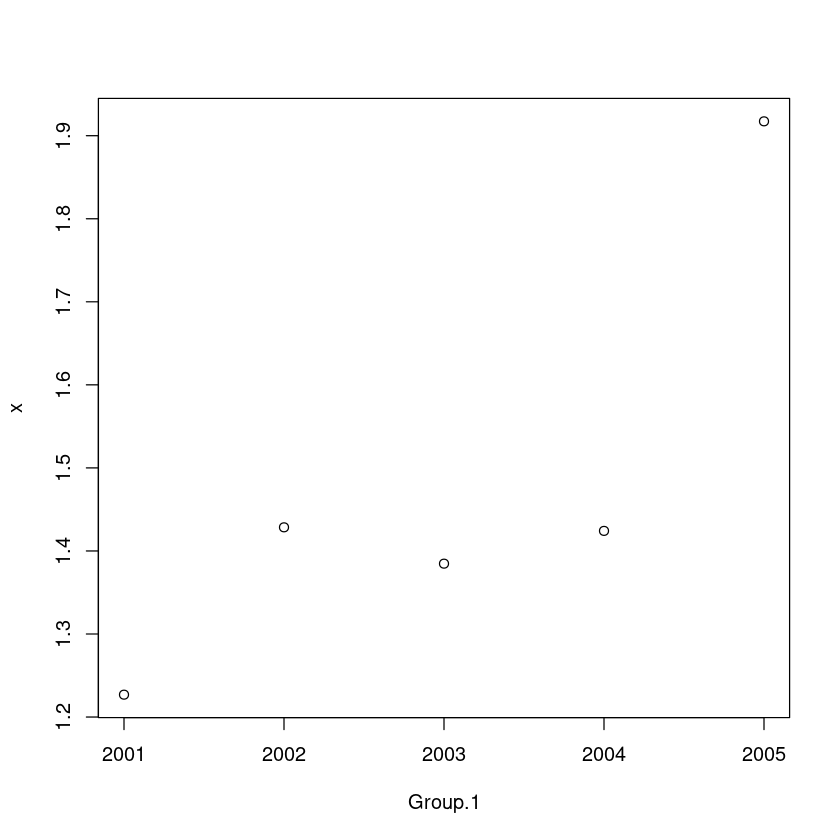

In [5]:
aggregate(Volume, list(Year), mean)

points = aggregate(Volume, list(Year), mean)
p_df = data.frame(points)
plot(p_df)

In [6]:
glm.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, family=binomial)

In [7]:
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [9]:
glm.probs=predict (glm.fit ,type="response")

In [12]:
print(glm.probs[1:10])

        1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378 


In [13]:
contrasts(Direction)

,Up
Down,0
Up,1


In [17]:
glm.pred=rep("Down" ,1250)

In [19]:
glm.pred[1:10]

[1] "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down"

In [29]:
glm.pred[glm.probs >.5]="Up"

In [30]:
glm.pred[1:10]

[1] "Up"   "Down" "Down" "Up"   "Up"   "Up"   "Down" "Up"   "Up"   "Down"

In [31]:
table(glm.pred ,Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [32]:
mean(glm.pred==Direction)

[1] 0.5216

In [69]:
train=(Year <2005)

In [70]:
Smarket.2005 = Smarket[!train,]

In [71]:
dim(Smarket.2005)

[1] 252   9

In [72]:
Direction.2005 = Direction[!train]

In [73]:
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, family=binomial, subset=train)

In [74]:
glm.probs = predict(glm.fit, Smarket.2005, type="response")

In [75]:
glm.pred=rep("Down",252)
glm.pred[glm.probs >.5]="Up"
table(glm.pred ,Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

In [76]:
mean(glm.pred==Direction.2005)

[1] 0.4801587

In [77]:
mean(glm.pred!=Direction.2005)

[1] 0.5198413

In [78]:
glm.fit=glm(Direction~Lag1+Lag2, family=binomial, subset=train)

glm.probs=predict (glm.fit ,Smarket.2005, type="response")
glm.pred=rep("Down",252)
glm.pred[glm.probs >.5]="Up"

table(glm.pred ,Direction.2005)

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

In [79]:
mean(glm.pred==Direction.2005)

[1] 0.5595238

In [80]:
106/(106+76)

[1] 0.5824176

In [81]:
predict (glm.fit, newdata = data.frame(Lag1=c(1.2 ,1.5), Lag2=c(1.1,-0.8)), type="response")

1         2 
0.4791462 0.4960939